In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The images are 28 * 28 resolution.

In [4]:
y_train = train_df.pop('label').values
X_train = train_df.values
X_test = test_df.values

In [5]:
print(X_train.shape, X_test.shape)

(42000, 784) (28000, 784)


In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(X_train.shape, X_test.shape)

(42000, 28, 28, 1) (28000, 28, 28, 1)


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3) # early stopping to prevent overfitting
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1, callbacks=[callback])

Epoch 1/10
296/296 [==============================] - 29s 99ms/step - loss: 0.5245 - accuracy: 0.8963 - val_loss: 0.1153 - val_accuracy: 0.9593
Epoch 2/10
296/296 [==============================] - 28s 96ms/step - loss: 0.0829 - accuracy: 0.9749 - val_loss: 0.0987 - val_accuracy: 0.9726
Epoch 3/10
296/296 [==============================] - 28s 95ms/step - loss: 0.0497 - accuracy: 0.9847 - val_loss: 0.0685 - val_accuracy: 0.9793
Epoch 4/10
296/296 [==============================] - 35s 120ms/step - loss: 0.0370 - accuracy: 0.9880 - val_loss: 0.0614 - val_accuracy: 0.9824
Epoch 5/10
296/296 [==============================] - 37s 126ms/step - loss: 0.0290 - accuracy: 0.9908 - val_loss: 0.0648 - val_accuracy: 0.9821
Epoch 6/10
296/296 [==============================] - 30s 100ms/step - loss: 0.0232 - accuracy: 0.9929 - val_loss: 0.0787 - val_accuracy: 0.9807
Epoch 7/10
296/296 [==============================] - 29s 99ms/step - loss: 0.0197 - accuracy: 0.9935 - val_loss: 0.0545 - val_accura

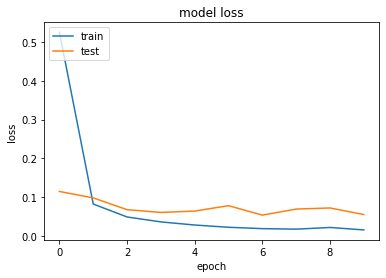

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[ 5.40501881e+00,  1.79530931e+00,  2.41828060e+01,
         5.18850386e-01, -8.76988792e+00, -1.28256235e+01,
        -1.18107815e+01,  9.04095173e+00,  4.29402065e+00,
         1.90924811e+00],
       [ 3.08222733e+01, -6.91627359e+00,  7.75781989e-01,
        -9.88013554e+00,  5.93766153e-01,  3.79196286e+00,
        -5.98985624e+00, -2.06337595e+00, -1.41387498e+00,
        -6.12432659e-01],
       [-1.25391901e+00, -2.40707606e-01,  9.03318264e-03,
         9.22587490e+00,  1.47228737e+01,  1.62959623e+00,
         4.10945463e+00,  8.45482635e+00,  1.54941616e+01,
         3.22052765e+01],
       [ 1.65011635e+01, -1.05686092e+01,  2.66654205e+00,
         2.06789088e+00,  5.13670444e-01, -1.61232829e-01,
         3.21906805e+00, -4.06595421e+00,  9.48476124e+00,
         1.35761061e+01],
       [-7.46560097e+00, -9.47793901e-01,  7.74152231e+00,
         2.61103325e+01, -9.04559422e+00,  1.48038065e+00,
        -3.64191437e+00,  7.10658932e+00,  1.04436178e+01,
         2.

In [14]:
y_submission = []
for i in range(y_pred.shape[0]):
    row = y_pred[i]
    best = np.argmax(row)
    y_submission.append(best)


In [15]:
y_submission[:5]

[2, 0, 9, 0, 3]